/data/datasets/timeseries/eeg/scalp/tuh_abnormal/edf/train/normal/01_tcp_ar/aaaaaawu_s004_t000.edf
Using matplotlib as 2D backend.
Extracting EDF parameters from /data/datasets/timeseries/eeg/scalp/tuh_abnormal/edf/train/normal/01_tcp_ar/aaaaaawu_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360749  =      0.000 ...  1442.996 secs...


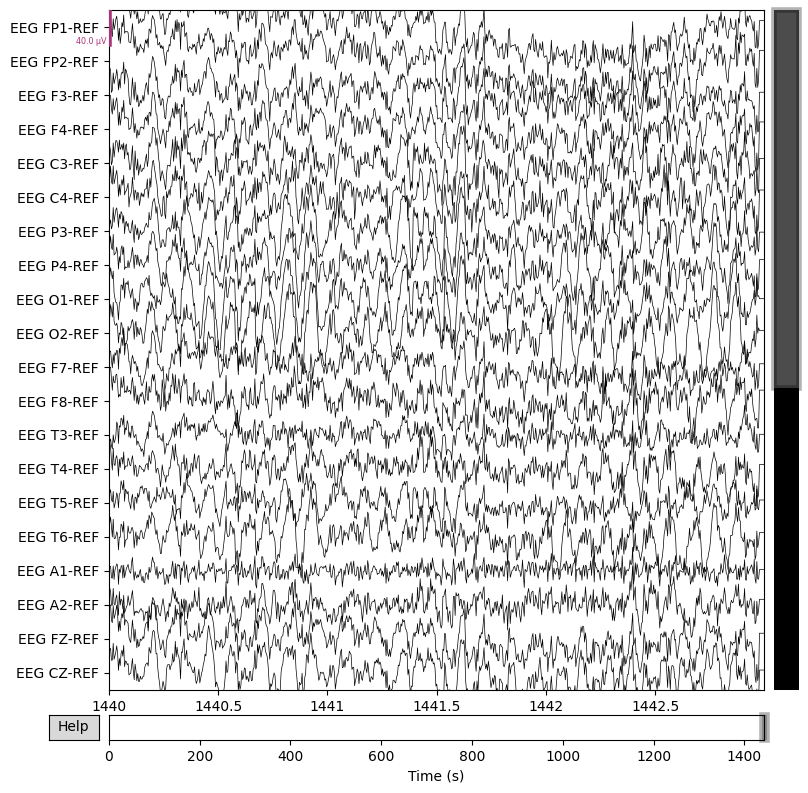

[]

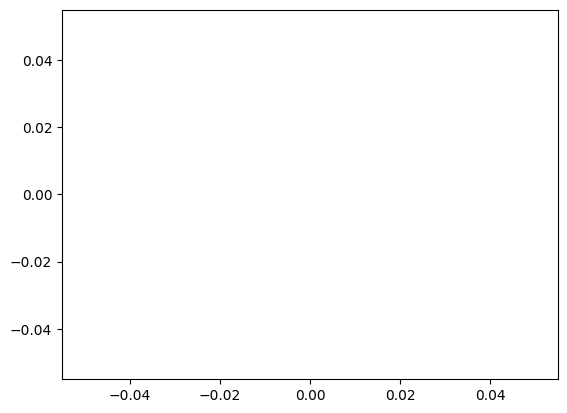

In [1]:
import os
import matplotlib.pyplot as plt
# %matplotlib notebook
data_path = '/data/datasets/timeseries/eeg/scalp/tuh_abnormal/edf/train/normal/01_tcp_ar'

all_recs = os.listdir(data_path)
all_recs.sort()
first_rec = all_recs[13] # 0, 10
edf_file_path = os.path.join(data_path, first_rec)
print(edf_file_path)

import mne
mne.viz.set_browser_backend('matplotlib')
raw = mne.io.read_raw_edf(edf_file_path, preload=True)
raw.load_data()
# raw.plot()
# plt.show()

# time in mins
raw.plot(duration=10, start=1440)
plt.plot()

/data/datasets/timeseries/eeg/scalp/tuh_abnormal/edf/train/normal/01_tcp_ar/aaaaaaav_s004_t000.edf
Extracting EDF parameters from /data/datasets/timeseries/eeg/scalp/tuh_abnormal/edf/train/normal/01_tcp_ar/aaaaaaav_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 316999  =      0.000 ...  1267.996 secs...


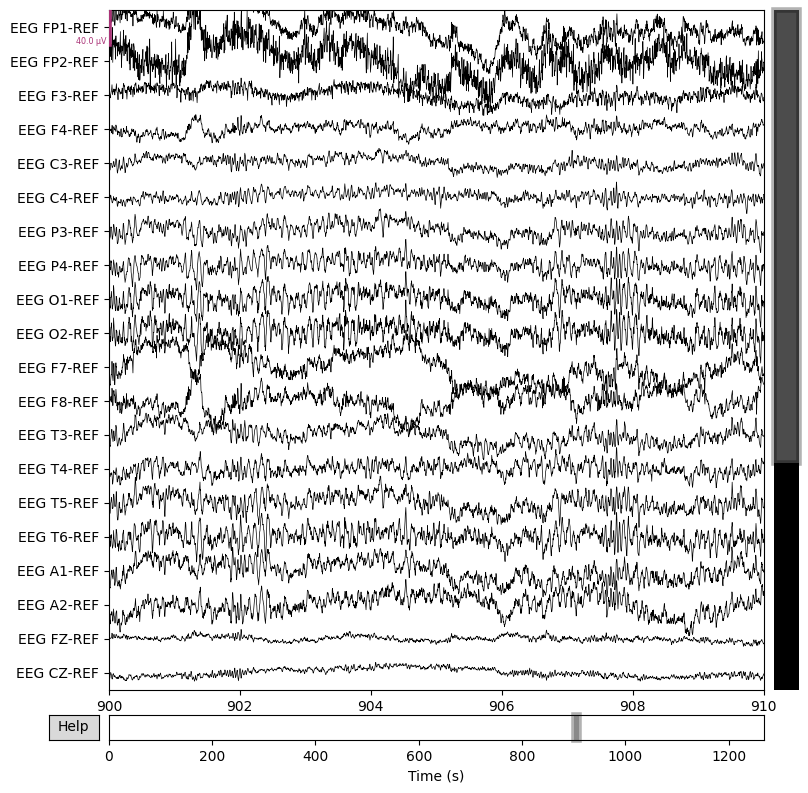

[]

In [2]:
import os
import matplotlib.pyplot as plt
# %matplotlib notebook
data_path = '/data/datasets/timeseries/eeg/scalp/tuh_abnormal/edf/train/normal/01_tcp_ar'

all_recs = os.listdir(data_path)
all_recs.sort()
first_rec = all_recs[0] # 0, 10
edf_file_path = os.path.join(data_path, first_rec)
print(edf_file_path)

import mne
mne.viz.set_browser_backend('matplotlib')
raw = mne.io.read_raw_edf(edf_file_path, preload=True)
raw.load_data()
# raw.plot()
# plt.show()

# time in mins
raw.plot(duration=10, start=900)
plt.plot()

In [3]:
# take the first 10 recordings
all_recs[0:10]

# verify whether they are 10 differrtnt patinets
patient_ids_set = set()
for rec in all_recs[0:10]:
    patient_id = rec.split('_')[0]
    patient_ids_set.add(patient_id)

print('size of patient_ids_set:', len(patient_ids_set))

size of patient_ids_set: 10


In [4]:
# for each recording remoe 300 seconds from the start and the end

def remoev_time_stamps_from_start_end(raw, start_time, end_time):
    # remove 300 seconds from the start and the end
    raw.crop(tmin=start_time, tmax=end_time)
    return raw

In [5]:
# create a new directory and save the recordings there
import os
import shutil
import mne

os.makedirs('../tuhab_records', exist_ok=True)

for rec in all_recs[0:10]:
    edf_path = os.path.join(data_path, rec)
    if os.path.exists(edf_path):
        # copy the file to the new directory
        shutil.copy(edf_path, '../tuhab_records')

In [15]:
# read files from the new directory and crop them and save them
import os
import shutil
import mne
# from edfio import edfread
import pandas as pd
import sys

sys.path.append('../')
sys.path.append('../preprocessing')
from preprocessing import preprocess_tuh as preprocess
from eeg_utils import get_standard_channel_lists

data_path = '../tuhab_records'
cropped_data_path = os.path.join(data_path, 'tuhab_records_cropped')
channel_lists = get_standard_channel_lists()
os.makedirs(cropped_data_path, exist_ok=True)
crop_time = 300 # seconds

filenames = []
time_lens = []

for rec in os.listdir(data_path):
    edf_path = os.path.join(data_path, rec)
    try:
        if os.path.exists(edf_path):
            raw = mne.io.read_raw_edf(edf_path, preload=True)
            raw.load_data()
            print('before cropping, raw times:', raw.times[0], raw.times[-1])
            # remove 300 seconds from the start and the end
            raw.crop(tmin=crop_time, tmax=raw.times[-1]-crop_time-1)

            print('after cropping, raw times:', raw.times[0], raw.times[-1])

            raw = preprocess.select_channels(raw, channel_lists['tuh_reduced'], channel_lists['le_names'])
            raw = preprocess.apply_montage(raw)
            raw = preprocess.apply_filters(raw, notch_freq=60, bandpass_freqs=(0.5, 35))
            raw = preprocess.resample_data(raw, target_freq=100)
            data = raw.get_data()
            print('data shape:', data.shape)

            data = preprocess.normalize_data(data)
            data, original_channel_count = preprocess.standardize_channels(data, target_channels=19)
            output_path = preprocess.save_processed_data(data, edf_path, cropped_data_path, 'npy')

            print('output path:', output_path)

            # add the file path and time length to the dataframe
            filenames.append(os.path.basename(output_path))
            time_lens.append(data.shape[1])
    except Exception as e:
        print('error in processing file:', edf_path)
        print(e)

# save the dataframe to a csv file
df = pd.DataFrame({'filename': filenames, 'time_len': time_lens})
df.to_csv(os.path.join(cropped_data_path, 'tuhab_records_cropped.csv'), index=False)


Extracting EDF parameters from /home/gayal/ssl-analyses-repos/PatchTST/tuhab_records/aaaaaaav_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 316999  =      0.000 ...  1267.996 secs...
before cropping, raw times: 0.0 1267.996
after cropping, raw times: 0.0 666.996
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.60

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


before cropping, raw times: 0.0 1218.996
after cropping, raw times: 0.0 617.996
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


before cropping, raw times: 0.0 1316.996
after cropping, raw times: 0.0 715.996
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


before cropping, raw times: 0.0 1205.996
after cropping, raw times: 0.0 604.996
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


before cropping, raw times: 0.0 1505.996
after cropping, raw times: 0.0 904.996
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


output path: ../tuhab_records/tuhab_records_cropped/aaaaaaqb_s004_t000_preprocessed.npy
Extracting EDF parameters from /home/gayal/ssl-analyses-repos/PatchTST/tuhab_records/aaaaaama_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 334499  =      0.000 ...  1337.996 secs...
before cropping, raw times: 0.0 1337.996
after cropping, raw times: 0.0 736.996
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


before cropping, raw times: 0.0 1209.996
after cropping, raw times: 0.0 608.996
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


before cropping, raw times: 0.0 1324.996
after cropping, raw times: 0.0 723.996
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Creating raw.info structure...
Reading 0 ... 331499  =      0.000 ...  1325.996 secs...
before cropping, raw times: 0.0 1325.996
after cropping, raw times: 0.0 724.996
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


before cropping, raw times: 0.0 1181.996
after cropping, raw times: 0.0 580.996
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Extracting EDF parameters from /home/gayal/ssl-analyses-repos/PatchTST/tuhab_records/aaaaaaav_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 316999  =      0.000 ...  1267.996 secs...


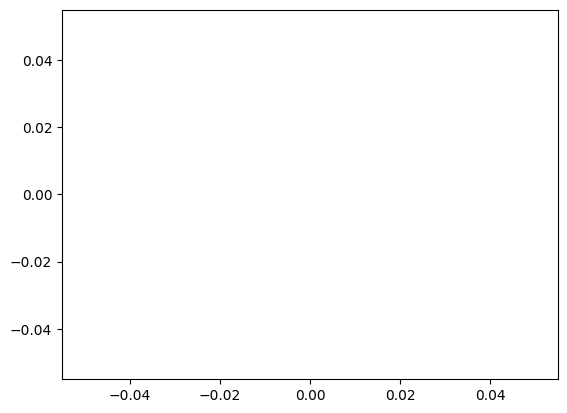

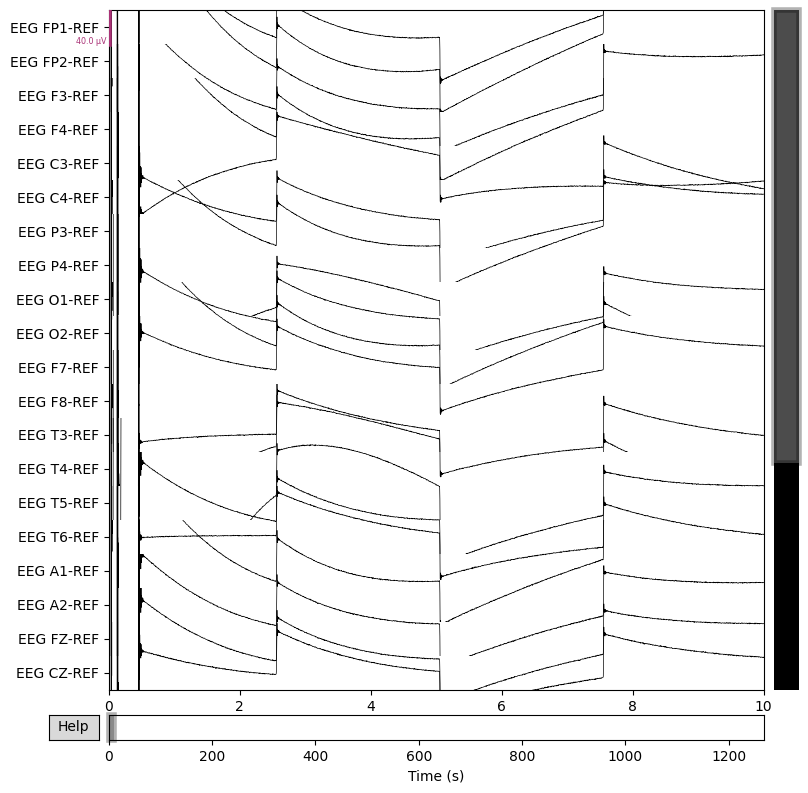

In [44]:
for rec in os.listdir(data_path):
    edf_path = os.path.join(data_path, rec)
    if os.path.exists(edf_path):
        raw = mne.io.read_raw_edf(edf_path, preload=True)
        raw.load_data()
        #plot
        raw.plot(duration=10, start=0)
        plt.plot()

    break